# Importação
No presente trabalho vamos analisar, preparar e estruturar as features e target variables para o treino de modelos de mineração de dados, utilizando tecnicas para seleção de Hiper parâmetros, e procedimentos para treino e validação de
modelos preditivos de Machine Learning.

Os modelos preditivos de Machine Learning utilizam dados e algoritmos estatísticos para identificar a probabilidade de acontecimentos futuros a partir de dados históricos. A utilização destes
modelos permite resolver problemas difíceis e descobrir novas oportunidades, sendo cada vez mais utilizados em diversas áreas como a deteção de fraudes, a otimização de campanhas de marketing,
melhoria de operações e redução de riscos.

Nesta etapa vamos fazer a importação de todas as bibliotecas que serão usadas no nosso estudo. Posteriormente faremos o carregamento do nosso dataset. O nosso dataset é constituído originalmente por 12 features, a maior parte delas numéricas, representam métricas sobre o consumo de água e recolha de resíduos por designação administrativa.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

Para Importação do dados usamos o Pandas, como os nossos dados estão em formato .xlsx usamos o metdoso read_execl para carregarmos o nosso dataframe.

In [ ]:
data = pd.read_excel('https://dados.gov.pt/s/dadosGovFiles/Dadosdaqualidadedosservicosdeaguaseresiduo.xlsx')

# Análise exploratória

Nesta etapa faremos a visualização dos dados, e algumas modificações no nosso dataset. Começamos por visualizar o formato dos dados, e converter as features que estavam armazenadas em um formato inadequado. 

In [ ]:
data

,Ano de referência,Unidade administrativa,Designação da unidade administrativa,Consumo de água autorizado na rede pública (m3),Consumo de água autorizado na rede pública (m3/habitante servido),Acessibilidade física do serviço de abastecimento de água (%),Destino adequado das águas residuais urbanas (%),Resíduos urbanos recolhidos (ton),Resíduos urbanos recolhidos (ton/habitante),Resíduos de embalagens recolhidos seletivamente (ton),Resíduos de embalagens recolhidos seletivamente (ton/habitante),Encargos médios por família com os serviços de águas e resíduos (€/ano)
0,2011,Concelho,ABRANTES,2371633,69.397163,92,100,16461,0.418589,1722.000000,0.043789,266.472
1,2011,Concelho,ÁGUEDA,ND,ND,100,100,17623,0.36923,1425.000000,0.029856,227.4
2,2011,Concelho,AGUIAR DA BEIRA,NR,ND,NR,NR,2154,0.393568,106.000000,0.019368,240
3,2011,Concelho,ALANDROAL,337491,69.194894,93,65,2256,0.386103,121.800000,0.020845,163.92
4,2011,Concelho,ALBERGARIA-A-VELHA,ND,ND,100,100,8947,0.354309,668.300000,0.026465,314.1936
...,...,...,...,...,...,...,...,...,...,...,...,...
597,2012,Comunidade intermunicipal ou área metropolitana,Comunidade Intermunicipal do Baixo Tâmega e So...,10122722.84,47.260377,ND,ND,148809.339,0.343738,9095.891000,0.021011,216.633164
598,2012,Comunidade intermunicipal ou área metropolitana,Comunidade Intermunicipal do Cávado,16317196,54.490249,91.971773,99.577811,157188.847,0.383229,17489.390000,0.042639,205.22
599,2012,Comunidade intermunicipal ou área metropolitana,Comunidade Intermunicipal do Douro,9587359.009,ND,ND,ND,76792.404785,0.37431,3727.578216,0.018169,ND
600,2012,Comunidade intermunicipal ou área metropolitana,Comunidade Intermunicipal do Médio Tejo,ND,ND,95.261698,ND,89312.1999,0.361104,8018.824000,0.032421,231.737538


In [ ]:

data['Consumo de água autorizado na rede pública (m3)'] = pd.to_numeric(data['Consumo de água autorizado na rede pública (m3)'], errors = 'coerce')
data['Consumo de água autorizado na rede pública (m3/habitante servido)'] = pd.to_numeric(data['Consumo de água autorizado na rede pública (m3/habitante servido)'], errors = 'coerce')
data['Acessibilidade física do serviço de abastecimento de água (%)'] = pd.to_numeric(data['Acessibilidade física do serviço de abastecimento de água (%)'], errors = 'coerce')
data['Destino adequado das águas residuais urbanas (%)'] = pd.to_numeric(data['Destino adequado das águas residuais urbanas (%)'], errors = 'coerce')
data['Resíduos urbanos recolhidos (ton)'] = pd.to_numeric(data['Resíduos urbanos recolhidos (ton)'], errors = 'coerce')
data['Resíduos urbanos recolhidos (ton/habitante)'] = pd.to_numeric(data['Resíduos urbanos recolhidos (ton/habitante)'], errors = 'coerce')
data['Resíduos de embalagens recolhidos seletivamente (ton)'] = pd.to_numeric(data['Resíduos de embalagens recolhidos seletivamente (ton)'], errors = 'coerce')
data['Resíduos de embalagens recolhidos seletivamente (ton/habitante)'] = pd.to_numeric(data['Resíduos de embalagens recolhidos seletivamente (ton/habitante)'], errors = 'coerce')
data['Encargos médios por família com os serviços de águas e resíduos (€/ano)'] = pd.to_numeric(data['Encargos médios por família com os serviços de águas e resíduos (€/ano)'], errors = 'coerce')



No código descrito abaixo verificamos se todos os dados numéricos foram convertidos de object para float.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Ano de referência                                                        602 non-null    int64  
 1   Unidade administrativa                                                   602 non-null    object 
 2   Designação da unidade administrativa                                     602 non-null    object 
 3   Consumo de água autorizado na rede pública (m3)                          479 non-null    float64
 4   Consumo de água autorizado na rede pública (m3/habitante servido)        473 non-null    float64
 5   Acessibilidade física do serviço de abastecimento de água (%)            533 non-null    float64
 6   Destino adequado das águas residuais urbanas (%)                         4

Durante o processo de exploração do nosso dataset decidimos, verificar o numero de valores em falta, e abaixo segue-se a quantidade de valores em falta por feature.
Tendo em vista que uma parcela dos algoritmos de machine learning, não admitem valores nulos, devemos sempre observar e definir estratégias para lidar com esse tipo de valor. 



In [ ]:
data.isnull().sum() 

Ano de referência                                                            0
Unidade administrativa                                                       0
Designação da unidade administrativa                                         0
Consumo de água autorizado na rede pública (m3)                            123
Consumo de água autorizado na rede pública (m3/habitante servido)          129
Acessibilidade física do serviço de abastecimento de água (%)               69
Destino adequado das águas residuais urbanas (%)                           113
Resíduos urbanos recolhidos (ton)                                            6
Resíduos urbanos recolhidos (ton/habitante)                                  6
Resíduos de embalagens recolhidos seletivamente (ton)                        0
Resíduos de embalagens recolhidos seletivamente (ton/habitante)              0
Encargos médios por família com os serviços de águas e resíduos (€/ano)     55
dtype: int64

Decidimos em primeira instância eliminar algumas features que consideramos irrelevantes para nossa análise.

Para evitar registos com muitos valores nulos, o que acaba por dificultar a analise, decidimos apagar todos os registos que têm mais de dois valores nulos. 



In [ ]:
data = data.drop(['Designação da unidade administrativa','Consumo de água autorizado na rede pública (m3)','Resíduos urbanos recolhidos (ton)','Resíduos de embalagens recolhidos seletivamente (ton)', 'Ano de referência'], axis = 1)
data = data.dropna(axis = 0, thresh = len(data.columns) - 2)

Apos a execução do código descrito acima, ficamos apenas com registos que tem no máximo dois valores nulos, mas como já foi citado em parágrafos acima os algoritmos de aprendizado de maquina não lidam bem com valores nulos, logo faz-se necessário a implementação de estratégias para resolver este tipo de problemas. 

Na secção pré-processamento têm a implementação e descrição da estratégia usada para tratar valores nulos.


In [ ]:
data.isna().sum()

Unidade administrativa                                                      0
Consumo de água autorizado na rede pública (m3/habitante servido)          88
Acessibilidade física do serviço de abastecimento de água (%)              33
Destino adequado das águas residuais urbanas (%)                           71
Resíduos urbanos recolhidos (ton/habitante)                                 2
Resíduos de embalagens recolhidos seletivamente (ton/habitante)             0
Encargos médios por família com os serviços de águas e resíduos (€/ano)    35
dtype: int64

In [ ]:
data.rename(columns = {'Encargos médios por família com os serviços de águas e resíduos (€/ano)':'Gastos por familia(€/ano)'},inplace=True)

O código abaixo mostra-nos as estatísticas dos valores numéricos do nosso dataset, podemos observar que a feature com maior desvio padrão é o Gastos por família(€/ano), observarvamos também que há uma diferença significativa entre o volume de resíduos recolhidos e recolhidos seletivamente. Esses indicadores nos ajudam a perceber melhor os nossos dados.

In [ ]:
data.describe()

,Consumo de água autorizado na rede pública (m3/habitante servido),Acessibilidade física do serviço de abastecimento de água (%),Destino adequado das águas residuais urbanas (%),Resíduos urbanos recolhidos (ton/habitante),Resíduos de embalagens recolhidos seletivamente (ton/habitante),Gastos por familia(€/ano)
count,471.000000,526.000000,488.000000,557.000000,559.000000,524.000000
mean,72.739401,92.993578,96.772035,0.437251,0.033973,205.651373
std,28.097838,10.184208,10.116080,0.128706,0.016047,76.934404
min,29.438239,27.000000,3.000000,0.227880,0.005208,30.360000
25%,57.227721,91.000000,100.000000,0.355659,0.023727,150.019500
50%,66.033223,97.000000,100.000000,0.409547,0.030477,199.200000
75%,79.652127,100.000000,100.000000,0.495955,0.040793,259.937400
max,231.958630,100.354964,100.000000,1.393529,0.153760,408.120000


In [ ]:
print(data.count())
data.isnull().sum()

Unidade administrativa                                               559
Consumo de água autorizado na rede pública (m3/habitante servido)    471
Acessibilidade física do serviço de abastecimento de água (%)        526
Destino adequado das águas residuais urbanas (%)                     488
Resíduos urbanos recolhidos (ton/habitante)                          557
Resíduos de embalagens recolhidos seletivamente (ton/habitante)      559
Gastos por familia(€/ano)                                            524
dtype: int64


Unidade administrativa                                                0
Consumo de água autorizado na rede pública (m3/habitante servido)    88
Acessibilidade física do serviço de abastecimento de água (%)        33
Destino adequado das águas residuais urbanas (%)                     71
Resíduos urbanos recolhidos (ton/habitante)                           2
Resíduos de embalagens recolhidos seletivamente (ton/habitante)       0
Gastos por familia(€/ano)                                            35
dtype: int64

Definimos como target a Unidade administrativa, então o objetivo da nossa análise é a partir dos dados ligados ao consumo de água, recolha de resíduos e encargos financeiros anuais por família, prever o target. 
No histograma abaixo podemos observar que a maior parte dos nosso registos têm como target o concelho, ou seja, o nosso target esta desbalanceado.

Para resolver este problema vamos usar a abortagem Oversampling, está implementação será feita na secção de pre-processamento.


In [ ]:
np.unique(data['Unidade administrativa'],return_counts=True)

(array(['Comunidade intermunicipal ou área metropolitana', 'Concelho'],
       dtype=object), array([ 31, 528]))

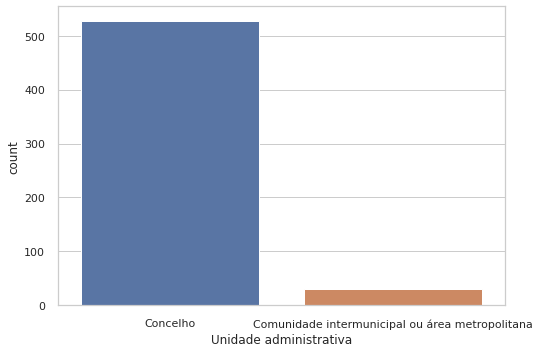

In [ ]:
sns.countplot(x = data['Unidade administrativa']);

In [ ]:
data.select_dtypes(include = 'object' ).describe()

,Unidade administrativa
count,559
unique,2
top,Concelho
freq,528


No histograma abaixo temos a distribuição dos dados dos gastos por família e a sua correlação com o target.

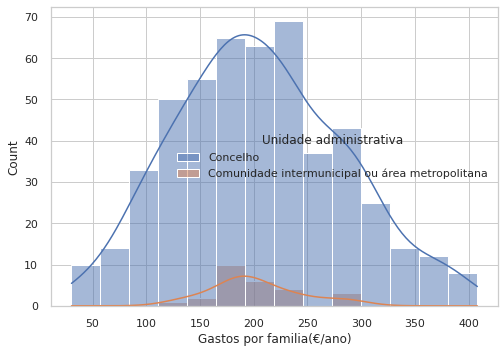

In [ ]:
sns.histplot(x='Gastos por familia(€/ano)', data=data, kde=True, hue='Unidade administrativa')  
plt.show()

Neste histograma verificamos de forma gráfica a frequência dos dados referentes do consumo de água autorizado na rede pública (m3/habitante servido), podemos observar que os dados mais frequentes variam entre 50 e 75, ou seja certa de 220 registos têm um consumo dentro deste intervalo.

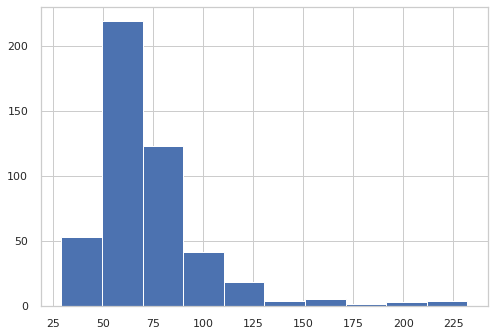

In [ ]:
plt.hist(x = data['Consumo de água autorizado na rede pública (m3/habitante servido)']);

No gráfico abaixo decidimos observar a correlação entre algumas das principais features do nosso dataset, observamos nesse gráfico que a priori temos dados uniformes, e nenhum valor que de para considerar como sendo um outlier. Esperávamos que as regiões onde temos maior gastos por família, fossem a com maior consumo de água por habitante, mas os gráficos mostram que as regiões com maior gastos por família são as que a media do somatório entre que o consumo de agua e recolha de resíduos atingem valores mais altos, ou seja, o que define em grande parte o gasto por família são essa duas features.

In [ ]:
c3 = 'Gastos por familia(€/ano)'
c1 = 'Consumo de água autorizado na rede pública (m3/habitante servido)'
c2 = 'Resíduos de embalagens recolhidos seletivamente (ton/habitante)'
ver = data[[c1,c2,c3]]
ver.rename(columns ={c1:'consumo agua',c2:'residuos recolhidos(tn/hb)'},inplace=True)
grafico = px.scatter_matrix(ver, dimensions=['consumo agua','residuos recolhidos(tn/hb)',c3], color = c3)
grafico.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



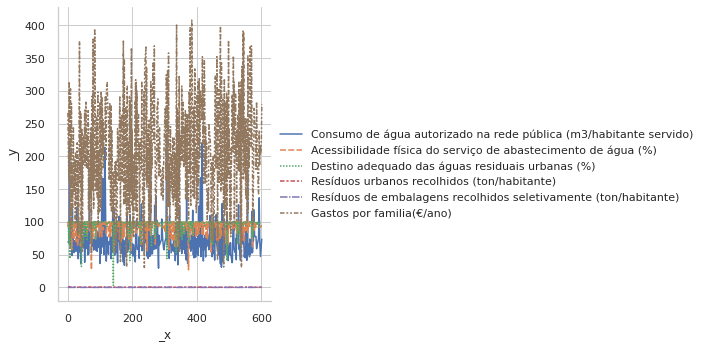

In [ ]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.relplot(data = data, kind = 'line')

# Pré-processamento

É uma fase essencial que precede a realização da modelagem,uma vez que se o conjunto de dados não está preparado, não conseguiremos alcançar bons resultados, tornando as análises e modelagens não confiáveis. Portanto, um correto pré-processamento é fundamental para garantir a qualidade e confiabilidade das nossas conclusões.

Na fase de exploração chegamos a fazer algumas modificações ao dataset, nomeadamente eliminar algumas features e apagar registos com mais de dois valores nulos. 

Nesta etapa vamos tornar o nosso conjunto de dados aptos para a utilização em algoritmos de machine learning.

O nosso primeiro passo foi procurar outliers dentro do nosso dataset, os calculos efectuados acabaram por demonstrar que não temos nenhum outlier, como podemos observar na célula abaixo. 


In [ ]:
def outliers(x):
        q1, q3 = np.percentile(x, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (iqr * 1.5)
        upper_bound = q3 + (iqr * 1.5)
        return (x < lower_bound) | (x > upper_bound)
data[outliers(data.iloc[:,2:])].count()

Unidade administrativa                                               0
Consumo de água autorizado na rede pública (m3/habitante servido)    0
Acessibilidade física do serviço de abastecimento de água (%)        0
Destino adequado das águas residuais urbanas (%)                     0
Resíduos urbanos recolhidos (ton/habitante)                          0
Resíduos de embalagens recolhidos seletivamente (ton/habitante)      0
Gastos por familia(€/ano)                                            0
dtype: int64

## Tratar valores nulos e inconsistentes

Para o tratamento dos valores nulos, usamos dois tipos de abordagem, para o Resíduos urbanos recolhidos (ton/habitante) decidimos eliminar todos os registos, onde esta feature estava vazia, optamos por esta abordagem porque tínhamos apenas dois registos com valores nulos. Para as features com valores nulos restantes acabamos por substituir pela média, optamos por está opção pois todas as features restantes com exceção do Gastos por familia(€/ano), tinham um variação muito baixa.

In [ ]:
#data.index;

In [ ]:
#data = data.drop(data[data['Resíduos urbanos recolhidos (ton/habitante)'].isnull()].index)
data = data.drop([ 119, 565], axis=0)
data['Gastos por familia(€/ano)'].fillna(data['Gastos por familia(€/ano)'].mean(), inplace = True)
data['Consumo de água autorizado na rede pública (m3/habitante servido)'].fillna(data['Consumo de água autorizado na rede pública (m3/habitante servido)'].mean(),inplace=True)
data['Acessibilidade física do serviço de abastecimento de água (%)'].fillna(data['Acessibilidade física do serviço de abastecimento de água (%)'].mean(),inplace=True)#fillna(method='ffill',inplace=True)
data['Destino adequado das águas residuais urbanas (%)'].fillna(data['Destino adequado das águas residuais urbanas (%)'].mean(),inplace=True)

In [ ]:
data.isnull().sum()

Unidade administrativa                                               0
Consumo de água autorizado na rede pública (m3/habitante servido)    0
Acessibilidade física do serviço de abastecimento de água (%)        0
Destino adequado das águas residuais urbanas (%)                     0
Resíduos urbanos recolhidos (ton/habitante)                          0
Resíduos de embalagens recolhidos seletivamente (ton/habitante)      0
Gastos por familia(€/ano)                                            0
dtype: int64

## Divisão entre previsores e Label

Nesta etapa dividimos nosso conjunto de dados em dois, uma variável recebeu o target e a outra os atributos previsores.

In [ ]:
X_data = data.iloc[:,1:]#.values
#X_data = np.concatenate((cat, X_data), axis=1)
X_data.shape

(557, 6)

In [ ]:
Y_data = data.iloc[:,0]#.values
Y_data.shape

(557,)

## Implementando o Over Sampling

Como tínhamos observado na análise exploratória, o nosso target estava desbalanceado, isso pode provocar erros na analise, fazendo com que as nossas previsões tendam a ser classificadas como pertencentes a classe com maior número de observações, deste modo teríamos um algoritmo enviesado.
Para resolvermos esse problema, optaremos pela abordagem over-sampling, essa abordagem ela equaliza as classes aumentando a quantidade de observações da classe minoritária. Para a implementação do over-sampling utilizaremos a função SMOTE do pacote imblearn.



In [ ]:
smt = SMOTE()

In [ ]:
X_data, Y_data = smt.fit_resample(X_data,Y_data)

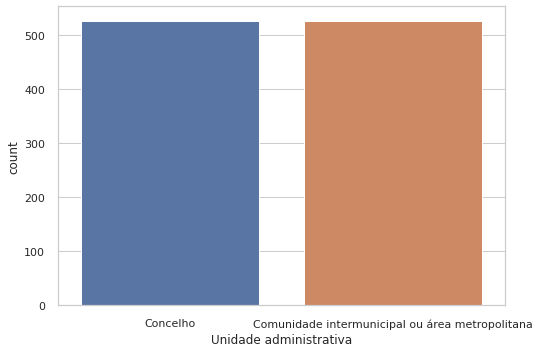

In [ ]:
sns.countplot(x = Y_data);

In [ ]:
X_data.shape, Y_data.shape

((1052, 6), (1052,))

## Transformar a nossa label(target) de valores categoricos para numericos

O nosso dataset nesta fase têm apenas uma feature com valor categórico, por se tratar do nosso target, para transformação desta feature optamos por usar o LabelEncoder do scit-learning.  




In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
Y_data = label_encoder_teste.fit_transform(Y_data)
Y_data.shape

(1052,)

In [ ]:
Y_data

array([1, 1, 1, ..., 0, 0, 0])

## Padronizacao dos dados

Os algoritmos de machine learning, criam os seus modelos baseados em cálculos estatísticos realizados com os valores de entrada, logo se usarmos dados em escalas diferentes os nossos algoritmos podem de maneira errónea atribuir maior peso a valores que estejam numa escala maior, deste modo prejudicando a confiabilidade do nosso modelo. Por está razão optamos por padronizar os dados.

A abordagem escolhida para a padronização foi o MinMaxScaler.



In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_data = scaler.fit_transform(X_data.values)
X_data

array([[0.19730815, 0.88610226, 1.        , 0.16360703, 0.25971139,
        0.62503177],
       [0.21430891, 0.995161  , 1.        , 0.12126302, 0.16592005,
        0.52160102],
       [0.19630939, 0.89973461, 0.63917526, 0.13573786, 0.10526374,
        0.35355781],
       ...,
       [0.15541167, 0.92386502, 0.97862698, 0.18910364, 0.21753951,
        0.67739584],
       [0.36014271, 0.89765832, 0.91236555, 0.30167289, 0.23549563,
        0.35706418],
       [0.21430891, 0.95244263, 0.97531153, 0.15991281, 0.15329552,
        0.43069466]])

In [ ]:
#Y_data = scaler.fit_transform(Y_data.reshape(-1,1))

##Divisao entre dados de Treino e Teste

Dividimos os nossos dados recorrendo ao train_test_split do scit-learning, por temos um conjunto de dados relativamnete pequeno, optamos por definir 25% dos dados para teste.

In [ ]:
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, Y_data, test_size = 0.25, random_state = 0)

In [ ]:
X_data_train.shape,y_data_train.shape

((789, 6), (789,))

In [ ]:
X_data_test.shape,y_data_test.shape

((263, 6), (263,))

# Mineração de dados

Nesta etapa submetemos os nossos dados aos algoritmos para gerar os nossos modelos com os dados de treino.

Decidimos nessa etapa gerar os modelos de duas formas, uma usando os algoritmos de machine learning com os parâmetros padrão e outra recorrendo ao gridSearchCV para selecionar os melhores Hiper parâmetros para geração do modelo. Para a busca de Hiper parâmetros, definimos 10 folds para o cross-validation. 

Nas células abaixo podemos observar a geração dos modelos para cada algoritmo.



In [ ]:
def scoreM(model):
      print(model)
      previsoes = model.predict(X_data_test)
      print('resultado completos')
      print(classification_report(y_data_test, previsoes))
      print(' ')
      print("    acurácia com dados de treino:", model.score(X_data_train, y_data_train))
      print('   acurácia com dados de teste:',accuracy_score(y_data_test, previsoes))


In [ ]:
models = []
def see_models(): 
    for model in models:
        print()
        print(model)
        previsoes = model.predict(X_data_test)
        print('resultado completos')
        print(classification_report(y_data_test, previsoes))
        print(' ')
        print("    acurácia com dados de teste:", model.score(X_data_train, y_data_train))
        print('   acurácia com dados de treino:',accuracy_score(y_data_test, previsoes))
        print(' ')
def hiperparametros(griSearch):
  print('melhores hiperparâmetros:')
  print(griSearch.best_params_)

## Naive Bayes

In [ ]:
naive = GaussianNB()
models.append(naive.fit(X_data_train, y_data_train))

## Árvores de decisão

In [ ]:
DTree = DecisionTreeClassifier(criterion='entropy')
models.append(DTree.fit(X_data_train, y_data_train))

## Ensambles

In [ ]:
classifier = RandomForestClassifier()#max_features = 0.5, n_estimators = 1000, n_jobs = -1, verbose = 1
models.append(classifier.fit(X_data_train, y_data_train))

classifier = AdaBoostClassifier()
models.append(classifier.fit(X_data_train, y_data_train))

classifier = GradientBoostingClassifier()
models.append(classifier.fit(X_data_train, y_data_train))

## SVM

In [ ]:
svm = SVC()
models.append(svm.fit(X_data_train, y_data_train))

## Rede Neuronal

In [ ]:
rn = MLPClassifier(max_iter=1500)
models.append(rn.fit(X_data_train, y_data_train))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.



## Otimização com  base da seleção dos melhores hiperparâmetros



### Árvore de decisão

In [ ]:
parametros_AT = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
griSearchAT = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_AT,cv=10)
#griSearchAT.fit(X_data_train, y_data_train)
models.append(griSearchAT.fit(X_data_train, y_data_train))
hiperparametros(griSearchAT)

melhores hiperparâmetros:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


### Ensambles

#### Random Forest

In [ ]:
parametros_RF = {'n_estimators':[10,20,100],'max_features':[0.5,1.0],'criterion' : ['gini','entropy'],'max_depth': [None,100,200]}

In [ ]:
griSearchRF = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_RF,cv=10)
#griSearchRF.fit(X_data_train, y_data_train)
models.append(griSearchRF.fit(X_data_train, y_data_train))
hiperparametros(griSearchRF)

melhores hiperparâmetros:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.5, 'n_estimators': 10}


#### AdaBoost

In [ ]:
parametros_AB = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'algorithm' : ['SAMME','SAMME.R']}

In [ ]:
griSearchAB = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=parametros_AB,cv=10)
#griSearchAB.fit(X_data, Y_data)
models.append(griSearchAB.fit(X_data_train, y_data_train))
hiperparametros(griSearchAB)
# luche_param = griSearchAT.best_params_
# luche_result = griSearchAT.best_score_
# print('melhores hiperparâmetros:')
# print(luche_param)
# #print('melhore resultado:')
# #print(luche_result)

melhores hiperparâmetros:
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 2000}


#### Gradient Boosting

In [ ]:
parametros_GB = {'loss': ['deviance', 'exponential'],'n_estimators' : [100,200,500],'max_features' : ['sqrt','log2'],'max_depth' : [3,10,50] }

In [ ]:
griSearchGB = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parametros_GB,cv=10)
#griSearchGB.fit(X_data, Y_data)
models.append(griSearchGB.fit(X_data_train, y_data_train))
hiperparametros(griSearchGB)

melhores hiperparâmetros:
{'loss': 'exponential', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


### SVM

In [ ]:
parametrosSVM = {'tol': [0.001, 0.0001, 0.00001],
              'C': [ 1.0, 1.5,2.0],
              'kernel': ['linear', 'poly','sigmoid', 'rbf']}

In [ ]:
griSearchSVM = GridSearchCV(estimator=SVC(), param_grid=parametrosSVM,verbose=1,cv=10)
#griSearchSVM.fit(X_data, Y_data)
print('melhores hiperparâmetros:')
models.append(griSearchSVM.fit(X_data_train, y_data_train))
print(griSearchSVM.best_params_)

melhores hiperparâmetros:
Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}


### Redes Neuronais

In [ ]:
parametrosRN = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam','sgd'],
              'batch_size': [10, 56],
              }

In [ ]:
griSearchRN = GridSearchCV(estimator=MLPClassifier(), param_grid=parametrosRN,cv=10)
#griSearchRN.fit(X_data, Y_data)
models.append(griSearchRN.fit(X_data_train, y_data_train))

# Avaliação

Nesta etapa vamos avaliar, o desempenho de cada modelo gerado na etapa anterior, a métrica principal que definimos para comparar os algoritmos é a accuarcy. 

Escolhemos a accuaracy como métrica, porque temos uma base de dados balanceada.

## Resultado de cada algoritmo

### Naive Bayes

O Naive Bayes têm poucos hiper parâmetros, por isso não chegamos a usar o gridSearch para este algoritmo.  

In [ ]:
scoreM(models[0])

GaussianNB()
resultado completos
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       143
           1       0.86      0.73      0.79       120

    accuracy                           0.83       263
   macro avg       0.83      0.82      0.82       263
weighted avg       0.83      0.83      0.82       263

 
    acurácia com dados de treino: 0.8035487959442332
   acurácia com dados de teste: 0.8250950570342205


Obtivemos uma accuarcy no teste de 83%, a pior metrica nesse algoritimo foi o recall para a classe 1(concelho), isso quer dizer que um numero relativamente significativo de classes que eram do tipo um quem foram classificadas como zero.

### Árvore de decisão

As Arvores de Decisão são uma das alternativas para a resolução de problemas de classificação.

Nas duas tentivas obtivemos os mesmos resultados uma accuaracy de 95%.



In [ ]:
print('             -----------Sem Otimização--------------')
scoreM(models[1])
print('')
print('             -----------com Otimização--------------')
scoreM(models[7])


             -----------Sem Otimização--------------
DecisionTreeClassifier(criterion='entropy')
resultado completos
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       143
           1       0.94      0.96      0.95       120

    accuracy                           0.95       263
   macro avg       0.95      0.95      0.95       263
weighted avg       0.95      0.95      0.95       263

 
    acurácia com dados de treino: 1.0
   acurácia com dados de teste: 0.9543726235741445

             -----------com Otimização--------------
GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})
resultado completos
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     

### Random Forest

Os resultados com o Random Forest, foram melhores com as configurações padrão, obtivemos uma accuacy de 97.3%. 


In [ ]:
print('             -----------Sem Otimização--------------')
scoreM(models[2])
print('')
print('-----------com Otimização--------------')
scoreM(models[8])

             -----------Sem Otimização--------------
RandomForestClassifier()
resultado completos
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       143
           1       0.97      0.97      0.97       120

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263

 
    acurácia com dados de treino: 1.0
   acurácia com dados de teste: 0.973384030418251

-----------com Otimização--------------
GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 100, 200],
                         'max_features': [0.5, 1.0],
                         'n_estimators': [10, 20, 100]})
resultado completos
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       143
           1       0.97      0.96 

### AdaBoost

Neste algoritimos tal como no anterior obtivemos um desempenho melhor com as configuração padrão, a accuaracy foi de 95.4%



In [ ]:
print('             -----------Sem Otimização--------------')
scoreM(models[3])
print('')
print('-----------com Otimização--------------')
scoreM(models[9])

             -----------Sem Otimização--------------
AdaBoostClassifier()
resultado completos
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       143
           1       0.97      0.93      0.95       120

    accuracy                           0.95       263
   macro avg       0.96      0.95      0.95       263
weighted avg       0.96      0.95      0.95       263

 
    acurácia com dados de treino: 0.9923954372623575
   acurácia com dados de teste: 0.9543726235741445

-----------com Otimização--------------
GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]})
resultado completos
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       143
           1       0.97      0.93      0.94       120

    accuracy 

### Gradient Boosting

Com o modelo gerado por este algoritmo, e usando o GridSearchCV para selecionar os melhores hiper parâmetros, obtivemos um melhor resultado, ou seja, os hiper parâmetros selecionados causaram uma melhora no desempenho, a accuaracy foi de 96.9%.

In [ ]:
print('             -----------Sem Otimização--------------')
scoreM(models[4])
print('')
print('-----------com Otimização--------------')
scoreM(models[10])

             -----------Sem Otimização--------------
GradientBoostingClassifier()
resultado completos
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       143
           1       0.96      0.95      0.95       120

    accuracy                           0.96       263
   macro avg       0.96      0.96      0.96       263
weighted avg       0.96      0.96      0.96       263

 
    acurácia com dados de treino: 1.0
   acurácia com dados de teste: 0.9581749049429658

-----------com Otimização--------------
GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 10, 50],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})
resultado completos
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       143
           1       

### SVM

Apesar do modelo SVM ser, em teoria, mais adequadas a problemas de classificação de datasets de grandes dimensões, verificamos um desempenho inferior,  em relação aos outros modelos testados.Observamos que para a classe 1, tivemos um numero relativamente elevado de falsos negativos, ou seja, valores que pertenciam a classe 0, mas foram classificado com pertencendo a classe 1. Essas métricas podem ser observada analisando o recall na classe 1 e o precision da classe 0.  

Os hiper parâmetros causaram uma melhora no desempenho, mas os resultados ficaram abaixo dos obtidos pelos com ensambles(o SVM teve uma accuaracy de 87.4%).

In [ ]:
print('             -----------Sem Otimização--------------')
scoreM(models[5])
print('')
print('-----------com Otimização--------------')
scoreM(models[11])

             -----------Sem Otimização--------------
SVC()
resultado completos
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       143
           1       0.95      0.72      0.82       120

    accuracy                           0.85       263
   macro avg       0.87      0.84      0.85       263
weighted avg       0.87      0.85      0.85       263

 
    acurácia com dados de treino: 0.7908745247148289
   acurácia com dados de teste: 0.8517110266159695

-----------com Otimização--------------
GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=1)
resultado completos
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       143
           1       0.95      0.77      0.85       120

    accuracy             

### Redes neuronais

O melhor resultado foi obtido com as configurações padrão, a accuaracy foi de 94.3%.

In [ ]:
print('             -----------Sem Otimização--------------')
scoreM(models[6])
print('')
print('-----------com Otimização--------------')
scoreM(models[12])

             -----------Sem Otimização--------------
MLPClassifier(max_iter=1500)
resultado completos
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       143
           1       0.98      0.90      0.94       120

    accuracy                           0.95       263
   macro avg       0.95      0.94      0.95       263
weighted avg       0.95      0.95      0.95       263

 
    acurácia com dados de treino: 0.9366286438529785
   acurácia com dados de teste: 0.9467680608365019

-----------com Otimização--------------
GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic', 'tahn'],
                         'batch_size': [10, 56], 'solver': ['adam', 'sgd']})
resultado completos
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       143
           1       0.93      0.91      0.92       120

    accuracy                           0.93    

In [ ]:
#see_models()

Dentre os algoritmos avaliados acabamos por obter o melhor desempenho com o Gradient Boosting Classifier, a accuracy obtida foi de 96.9%.

# Representação de conhecimento


A análise que se segue, consiste em pegar os modelos, com a configuração mais eficiente, e efetuar um cross-validation com 10 folds dentro de um ciclo com 50 iterações, onde em cada iteração vamos pegar o score medio de cada modelo.

 



In [ ]:
resultados_AR = []
resultados_ADA = []
resultados_RF = []
resultados_GR = []
resultados_RN = []
resultados_SVM = []

In [ ]:
for i in range(50):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  AR = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=2, splitter='best')
  scores = cross_val_score(AR, X_data, Y_data, cv = kfold)
  resultados_AR.append(scores.mean())

  random_forest = RandomForestClassifier(criterion= 'entropy', max_depth= 100, max_features= 0.5, n_estimators= 10)
  scores = cross_val_score(random_forest, X_data, Y_data, cv = kfold)
  resultados_RF.append(scores.mean())

  Ada=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 2000)
  scores = cross_val_score(Ada, X_data, Y_data, cv = kfold)
  resultados_ADA.append(scores.mean())

  GR = GradientBoostingClassifier(loss= 'exponential', max_depth= 3, max_features = 'log2', n_estimators= 100)
  scores = cross_val_score(GR, X_data, Y_data, cv = kfold)
  resultados_GR.append(scores.mean())
  print(scores)

  svm = SVC(kernel = 'linear', C = 2.0,tol= 0.001)
  scores = cross_val_score(svm,  X_data, Y_data, cv = kfold)
  resultados_SVM.append(scores.mean())

  rede_neuronal = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
  #rede_neuronal = MLPClassifier()
  scores = cross_val_score(rede_neuronal, X_data, Y_data, cv = kfold)
  resultados_RN.append(scores.mean())

In [ ]:
len(resultados_AR), len(resultados_RF),len(resultados_ADA),len(resultados_GR),len(resultados_SVM), len(resultados_RN)

(50, 50, 50, 50, 50, 50)

In [ ]:
resultadosCV = pd.DataFrame({'Arvore': resultados_AR, 
                          'Random forest': resultados_RF,
                          'AdaBoost Classifier': resultados_ADA, 
                          'Gradient Boosting': resultados_GR,
                          'SVM': resultados_SVM, 
                          'Rede neural': resultados_RN})

In [ ]:
resultadosCV.describe()

,Arvore,Random forest,AdaBoost Classifier,Gradient Boosting,SVM,Rede neural
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.960343,0.979165,0.975916,0.978977,0.620741,0.903727
std,0.004097,0.002622,0.001945,0.001937,0.004728,0.005346
min,0.949677,0.974322,0.972417,0.975274,0.611123,0.890665
25%,0.958178,0.977188,0.974333,0.977442,0.618742,0.900182
50%,0.960090,0.979088,0.975764,0.979088,0.619816,0.903989
75%,0.962920,0.980977,0.977206,0.980054,0.624259,0.907785
max,0.968643,0.985741,0.980027,0.982884,0.634106,0.913540


De modo geral podemos afirmar que com exceção do Naive Bayes e SVM,  todos os modelos testados apresentam um excelente desempenho para o nosso conjunto de dados. 

Apesar do modelo Random Forest, ter chegado atingir a accuaracy mais elevada durante
o cross-validation, concluimos que o modelo mais eficiente para o nosso conjunto de dados é o Gradient Boosting.Chegamos a essa conclusão, tendo como base a media e o desvio padrão obtidos. Podemos observar que o Gradient Boosting foi o algoritmo com menor desvio padrão e com media da accuaracy mais elevada. 
